In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file
df = pd.read_csv('../data/heart_disease_dataset_UCI.csv')

In [3]:
#looking at the existing information in the file
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#check data set dimensions
df.shape

(303, 14)

In [5]:
#check existing column information
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#check detailed information of columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#check the number of null values in the data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScalar = StandardScaler()
target_columns = ['age','trestbps','chol','thalach','oldpeak']
df[target_columns] = standardScalar.fit_transform(df[target_columns])

In [9]:
#check that the scaling has worked
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [10]:
X= df.drop(['target'], axis=1)
Y= df['target']

In [11]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25, random_state=40)

In [12]:
#check sample sizes
print('X_train: ', X_train.size)
print('X_test: ', X_test.size)
print('Y_train: ', Y_train.size)
print('Y_test: ', Y_test.size)

X_train:  2951
X_test:  988
Y_train:  227
Y_test:  76


In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
gaussBayes = GaussianNB()

In [15]:
gaussModel = gaussBayes.fit(X_train, Y_train)

In [16]:
predictionGaussBayes = gaussModel.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cmGaussBayes = confusion_matrix(Y_test, predictionGaussBayes)

In [19]:
cmGaussBayes

array([[30,  4],
       [ 5, 37]])

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(Y_test, predictionGaussBayes)

0.881578947368421

In [22]:
from sklearn.metrics import precision_score

In [23]:
precision_score(Y_test, predictionGaussBayes)

0.9024390243902439

In [24]:
from sklearn.metrics import recall_score

In [29]:
recall_score(Y_test, predictionGaussBayes)

0.8809523809523809

In [30]:
tn, fp, fn, tp = cmGaussBayes.ravel()

In [31]:
sensitivity = tp/(tp+fn)

In [32]:
sensitivity

0.8809523809523809

In [33]:
specificity = tn/(fp+tn)

In [34]:
specificity

0.8823529411764706

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

In [41]:
cDisp = ConfusionMatrixDisplay(confusion_matrix=cmGaussBayes)

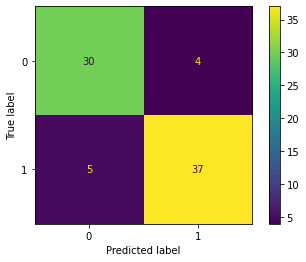

In [42]:
cDisp.plot()